## Uppgift 1 - uppvärmning covid-19 data
Börja med att manuellt läsa Excel-filerna och de olika bladen i varje dokument. Använd därefter Pandas för att läsa in bladet: "Veckodata Riket" i covid19-filen.

In [1]:
# Importing some of the tools i need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px

# File paths
covid19_file = "../Data/Folkhalsomyndigheten_Covid19.xlsx"
vaccine_file = "../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"


# Reading in sheet for the excel file
covid19 = pd.read_excel(covid19_file, sheet_name="Veckodata Riket")

covid19.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


## a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.

In [2]:
# How big of a dataset am I working with?
# How does the dataset look like?
# What kind of variables are in the dataset?


covid19.columns  # We can get a feel for the columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [3]:
covid19.describe()  # Summaries of general tendencies

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [4]:
covid19.shape  # 142 rows and 34 columns

(142, 13)

In [5]:
covid19.duplicated() # Nothing is duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
137    False
138    False
139    False
140    False
141    False
Length: 142, dtype: bool

In [6]:
covid19.info()  # Everything is filled. This is nice data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

## b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

```py
Vecka
2020v6
2020v7
...
2022v41
```

In [7]:
covid19["veckonummer"], covid19["år"]  # I'm comparing them. Making sure that the dtype is same

(0       6
 1       7
 2       8
 3       9
 4      10
        ..
 137    38
 138    39
 139    40
 140    41
 141    42
 Name: veckonummer, Length: 142, dtype: int64,
 0      2020
 1      2020
 2      2020
 3      2020
 4      2020
        ... 
 137    2022
 138    2022
 139    2022
 140    2022
 141    2022
 Name: år, Length: 142, dtype: int64)

In [8]:
# Merging 2 columns
covid19["år"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str)

# Drop column "veckonummer"
covid19 = covid19.drop(columns=["veckonummer"])


covid19.head()

,år,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [9]:
# Renames every column to english -> and making it easier to see what each column means

covid19 = covid19.rename(
    columns={
        "år": "Week",
        "Antal_fall_vecka": "Amount of cases / week",
        "Antal_fall_100000inv_vecka": "Amount of cases per 100000 popu / week",
        "Antal_fall_100000inv_14dagar": "Amount of cases per 100000 popu / 14 days",
        "Kum_antal_fall": "Cumulative amount of cases",
        "Kum_fall_100000inv": "Cumulative amount of 100000 population cases",
        "Antal_nyaintensivvårdade_vecka": "Total new ICU patients / week",
        "Kum_antal_intensivvårdade": "Cumulative amount of ICU patients",
        "Antal_avlidna_vecka": "Amount of deaths / week",
        "Antal_avlidna_milj_inv_vecka": "Amount of deaths per million popu / week",
        "Kum_antal_avlidna": "Cumulative deaths",
        "Kum_antal_avlidna_milj_inv": "Cumulative deaths per million popu",
    }
)

covid19.head(5)

,Week,Amount of cases / week,Amount of cases per 100000 popu / week,Amount of cases per 100000 popu / 14 days,Cumulative amount of cases,Cumulative amount of 100000 population cases,Total new ICU patients / week,Cumulative amount of ICU patients,Amount of deaths / week,Amount of deaths per million popu / week,Cumulative deaths,Cumulative deaths per million popu
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


# Draw line graphs
* c) Draw a line graph that shows Amount of deaths / week from 2020v6-now
* d) Draw a line graph that shows Amount of cases / week from 2020v6-now
* e) Draw a line graph of Amount of deaths / week and Amount of cases / week in the same window from 2020v6-now
* f) Draw a linegraph of Cumulative amount of cases from 2020v6-now

--- Tools ---
* Seaborn
* Plotly express

--- Other ---
* Use subplot 2x2 grid with the graphs

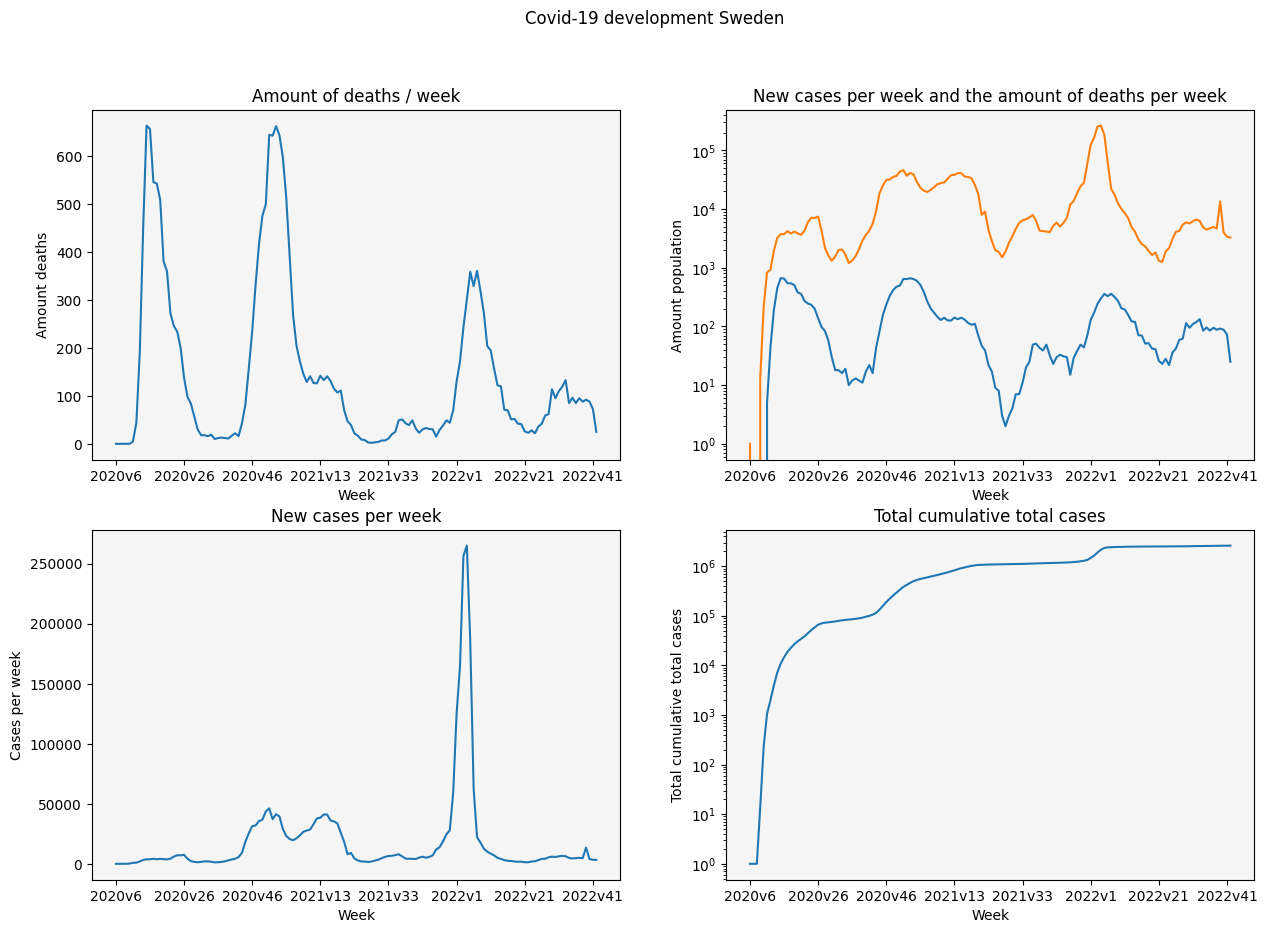

In [69]:

# Creating subplot with 4 graphs
fig, ax = plt.subplots(2, 2) # 2x2 grid
fig.set_size_inches(15, 10)
fig.suptitle("Covid-19 development Sweden")

# c) First graph
sns.lineplot(data = covid19, x="Week", y="Amount of deaths / week", ax=ax[0, 0])
ax[0, 0].set_title("Amount of deaths / week")
ax[0, 0].set_xticks(range(0, 145, 20))  # Set label locations. Start stop step (Steps 15 weeks at a time), # This is reading with a space between 20 weeks
ax[0, 0].set_ylabel("Amount deaths")
ax[0, 0].set_facecolor("whitesmoke")

# d) Second graph
sns.lineplot(data = covid19, x="Week", y="Amount of cases / week", ax=ax[1, 0])
ax[1, 0].set_title("New cases per week")
ax[1, 0].set_xticks(range(0, 145, 20))
ax[1, 0].set_ylabel("Cases per week")
ax[1, 0].set_facecolor("whitesmoke")

# e) Third graph
sns.lineplot(data = covid19, x="Week", y="Amount of deaths / week", ax=ax[0, 1])  # I want a promo aswell
sns.lineplot(data = covid19, x="Week", y="Amount of cases / week", ax=ax[0, 1])
ax[0, 1].set_title("New cases per week and the amount of deaths per week")
ax[0, 1].set_xticks(range(0, 145, 20))
ax[0, 1].set_ylabel("Amount population")
ax[0, 1].set(yscale="log")
ax[0, 1].set_facecolor("whitesmoke")

# Fourth graph
sns.lineplot(data=covid19, x="Week", y="Cumulative amount of cases", ax=ax[1, 1])
ax[1, 1].set_title("Total cumulative total cases")
ax[1, 1].set_xticks(range(0, 145, 20))
ax[1, 1].set_ylabel("Total cumulative total cases")
ax[1, 1].set(yscale="log")
ax[1, 1].set_facecolor("whitesmoke")

#plt.savefig("Visualiseringar/Covid19-Development.png")


## TODO: Maybe add promo? or something like that to get comparsions in the third graph 

# Using plotply express

In [11]:
fig = px.line(covid19, x="Week", y="Amount of deaths / week", title="Amount of deaths per week in Covid-19")
fig.show()

#TODO: Add in visualiseringar

In [12]:
fig = px.line(covid19, x="Week", y="Amount of cases / week", title= "Amount of cases per week in Covid-19")
fig.show()

#TODO: Add in visualiseringar

In [13]:
fig = px.line(
    covid19,
    x="Week",
    y=["Amount of deaths / week","Amount of cases / week"],
    log_y=True,
    title="Amount of deaths and cases per week in Covid-19",
    labels= {"value": "Amount of deaths / week"}
    )
fig.update_layout(legend={"title_text":""})
#fig.write_html("Visualiseringar/Covid19")
fig.show()

# TODO: Add to visualiseringar

In [14]:
fig = px.line(
    covid19,
    x="Week",
    y="Cumulative amount of cases",
    log_y=True,
    title="Cumulative amount of cases in Covid-19",
)
fig.show()

# TODO: Add to visualiseringar

## Uppgift 2 - uppvärmning vaccindata
I uppgifterna nedan ska du använda dig av datasetet vaccin och bladet Vaccinerade kommun och ålder.

Använd Plotly express för att rita diagrammen nedan för de uppgifter som kräver diagram. Använd Pandas
för att svara på frågor om datasetet. 


* a) Hur många län finns representerade i datasetet?

# vaccine_file

In [15]:

# Read in vaccine file as Pandas
vaccine = pd.read_excel(vaccine_file, sheet_name= "Vaccinerade kommun och ålder")

# We can see we got some null values, for "Antal 3 doser" och "Antal 4 doser".
# We can see the duplicated values
vaccine.info(), vaccine.describe(), vaccine.duplicated, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


(None,
                Län       Kommun     Befolkning  Antal minst 1 dos  \
 count  2900.000000  2900.000000    2900.000000        2900.000000   
 mean     13.227586  1382.089655    3135.444828        2693.233103   
 std       7.180466   714.442489    8015.433872        6762.997211   
 min       1.000000   114.000000      40.000000          31.000000   
 25%       7.000000   764.000000     608.000000         486.500000   
 50%      14.000000  1439.500000    1367.500000        1184.500000   
 75%      19.000000  1981.000000    3007.500000        2603.000000   
 max      25.000000  2584.000000  178611.000000      146396.000000   
 
        Antal minst 2 doser  Antal 3 doser  Antal 4 doser  Andel minst 1 dos  \
 count          2900.000000    2320.000000     870.000000        2900.000000   
 mean           2630.201724    2384.159483    1557.318391           0.857080   
 std            6542.139951    5245.058003    3013.031626           0.125466   
 min              30.000000      41.00000

In [16]:
vaccine.duplicated  # Gets the duplicated values

<bound method DataFrame.duplicated of       Län         Län_namn  Kommun     Kommun_namn           Ålder  \
0       1   Stockholms län     114  Upplands Väsby           12-15   
1       1   Stockholms län     114  Upplands Väsby           16-17   
2       1   Stockholms län     114  Upplands Väsby           18-29   
3       1   Stockholms län     114  Upplands Väsby           30-39   
4       1   Stockholms län     114  Upplands Väsby           40-49   
...   ...              ...     ...             ...             ...   
2895   25  Norrbottens län    2584          Kiruna           50-59   
2896   25  Norrbottens län    2584          Kiruna           60-69   
2897   25  Norrbottens län    2584          Kiruna           70-79   
2898   25  Norrbottens län    2584          Kiruna           80-89   
2899   25  Norrbottens län    2584          Kiruna  90 eller äldre   

      Befolkning  Antal minst 1 dos  Antal minst 2 doser  Antal 3 doser  \
0           2422               1206           

In [17]:
vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [18]:
# a) Hur många län finns representerade i datasetet?
# b) Hur många kommuner finns representerade i datasetet?

# I need to find the ID, and count the unique amount of values in the dataframe

# nuniqiue() - Count number of distinct elements in specified axis.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
# https://stackoverflow.com/questions/38309729/count-unique-values-per-groups-with-pandas

# vaccine["Kommun"].nunique()

# I need to make a function that can take both of these, since a/b) basically is the same solution (ish)

def ID(vaccine, column=None):
    unique = vaccine[column].nunique() 
    print(f"There are {unique} {column} in this dataset.")

In [19]:
# a) Hur många län finns representerade i datasetet?
ID(vaccine, column = "Län")

There are 21 Län in this dataset.


In [20]:
# b) Hur många kommuner finns representerade i datasetet?
ID(vaccine, column = "Kommun")

There are 290 Kommun in this dataset.


In [21]:
# c) Hur stor är befolkningen som är representerad i datasetet?

population = vaccine["Befolkning"].sum()
print(f"The population is {population} in this dataset")

The population is 9092790 in this dataset


In [22]:
vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [23]:
# d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp 
# statistik på hur stor totala befolkningen är i Sverige.

In [24]:
population12_17 = vaccine["Befolkning"][vaccine["Ålder"] == "12-15"].sum() + vaccine["Befolkning"][vaccine["Ålder"] == "16-17"].sum()
print(f"The population of children 12-17 is {population12_17} in this dataset")

The population of children 12-17 is 745370 in this dataset


# e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.

In [25]:
fig = px.bar(
    data_frame=vaccine,
    
    x="Ålder",
    y="Befolkning",
    color = "Län_namn",
    labels={"Ålder": "Ålder", "befolkning": "Befolkning"},
    title="Åldersfördelningen av Sveriges befolkning som är Vaccinerade",
    log_y= True,
    barmode= "group"
    
    
)
fig.show()


In [26]:
vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [57]:
#f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län

# Creating new DF grouped by share -> county
vaccine_share_län = vaccine.groupby(
    by="Län_namn")[["Antal minst 1 dos", "Antal minst 2 doser", "Antal 3 doser", "Antal 4 doser", "Befolkning"]].sum(numeric_only=True).reset_index()
vaccine_share_län

,Län_namn,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Befolkning
0,Blekinge län,122500,120727,92259.0,25059.0,139327
1,Dalarnas län,221420,218009,164296.0,48976.0,252075
2,Gotlands län,48785,47930,37423.0,10885.0,53924
3,Gävleborgs län,220389,215267,159636.0,45642.0,252216
4,Hallands län,259143,255329,191997.0,50583.0,295663
5,Jämtlands län,102236,100525,73332.0,19952.0,115398
6,Jönköpings län,274960,270266,199488.0,51399.0,317355
7,Kalmar län,190931,188522,147192.0,42395.0,216763
8,Kronobergs län,149141,146494,103745.0,27664.0,175503
9,Norrbottens län,198514,195919,149293.0,40385.0,220199


In [58]:
# f) Creating new DF grouped by share -> county

fig = px.bar(
    data_frame=vaccine_share_län,
    x="Län_namn",
    y=[
        vaccine_share_län["Antal minst 1 dos"] / vaccine_share_län["Befolkning"],
        vaccine_share_län["Antal minst 2 doser"] / vaccine_share_län["Befolkning"],
        vaccine_share_län["Antal 3 doser"] / vaccine_share_län["Befolkning"],
    ],
    labels={"Län_namn": "County", "y": "Doser", "variable": "Amount"},
    title="Share of people who received at least one dose of COVID-19 in each county",
    barmode="group", # We don't want to stack the bars
)

fig.update_layout(yaxis_title="Amount people 1,2,3 doses")

# New variable names
# Got help with this. Since my plot from the start where very simplefied in a bad way. Or rather couldn't find the command for switching names in the label of the hoover. And amount to the right.
newnames = {
    "wide_variable_0": "Vaccine shares 1 dose",
    "wide_variable_1": "Vaccine shares 2 doses",
    "wide_variable_2": "Vaccine shares 3 doses",
}
fig.for_each_trace(
    lambda t: t.update(
        name=newnames[t.name],
        legendgroup=newnames[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name]),
    )
)
fig.show()

 ## f) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,två doser, tre doser och fyra doser

In [59]:
vaccine_share_län.head() # We can see that for next 

,Län_namn,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Befolkning
0,Blekinge län,122500,120727,92259.0,25059.0,139327
1,Dalarnas län,221420,218009,164296.0,48976.0,252075
2,Gotlands län,48785,47930,37423.0,10885.0,53924
3,Gävleborgs län,220389,215267,159636.0,45642.0,252216
4,Hallands län,259143,255329,191997.0,50583.0,295663


In [60]:
# New df to group 2 countys and extend columns by 1 dose
vaccine_stockholm_västraG = vaccine_share_län.query("Län_namn == ('Västra Götalands län', 'Stockholms län')")
vaccine_stockholm_västraG

,Län_namn,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Befolkning
11,Stockholms län,1741130,1678031,1192864.0,236006.0,2094721
18,Västra Götalands län,1299275,1266642,882706.0,213347.0,1519483


In [64]:
fig = px.bar(
    data_frame=vaccine_stockholm_västraG,
    x="Län_namn",
    y=[
        vaccine_stockholm_västraG["Antal minst 1 dos"] / vaccine_stockholm_västraG["Befolkning"],
        vaccine_stockholm_västraG["Antal minst 2 doser"] / vaccine_stockholm_västraG["Befolkning"],
        vaccine_stockholm_västraG["Antal 3 doser"] / vaccine_stockholm_västraG["Befolkning"],
        vaccine_stockholm_västraG["Antal 4 doser"] / vaccine_stockholm_västraG["Befolkning"]
    ],
    labels={"Län_namn": "County", "y": "Doser", "variable": "Amount"},
    title="Share of people who received at least one dose against COVID-19 in Västra Götaland and Stockholms län",
    barmode="group", # We don't want to stack the bars
)

fig.update_layout(yaxis_title="Amount people 1,2,3 doses")

# New variable names
# Got help with this. Since my plot from the start where very simplefied in a bad way. Or rather couldn't find the command for switching names in the label of the hoover. And amount to the right.
newnames = {
    "wide_variable_0": "Vaccine shares 1 dose",
    "wide_variable_1": "Vaccine shares 2 doses",
    "wide_variable_2": "Vaccine shares 3 doses",
    "wide_variable_3": "Vaccine shares 4 doses"
}
fig.for_each_trace(
    lambda t: t.update(
        name=newnames[t.name],
        legendgroup=newnames[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name]),
    )
)
fig.show()

# Question 3 - KPI & explorative data analysis

* Define 3-6 KPIs that i will do data analysis on, spread on multiple sheets based on the two Excel-files we have:

-----------
* Number of people who have taken the 1st dose in the whole country

* Difference between men and women how many people has taken 2 doses in the whole country

* Number of people entering the intensive care every week

* Mortality rate
-------

* Document what i'm investigating with markdown

* Document what the result is and save all the visuals



In [75]:
# Number of people that got sick from Covid 19 in the whole country

# Reading in sheet for the excel file
people_sick = pd.read_excel(covid19_file, sheet_name= "Totalt antal per kön")


# 
people_sick.head()



,Kön,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Man,1210098,6550,11279
1,Kvinna,1381189,2947,9273
2,Uppgift saknas,20293,47,107


In [ ]:
# * Difference between how many men and women how many people has taken 2 doses in the whole country

# Reading in sheet for excel file
df = pd.DataFrame(vaccine_file, sheet_name="Vaccinerade kön")



# File paths
covid19_file = "../Data/Folkhalsomyndigheten_Covid19.xlsx"
vaccine_file = "../Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"


# Reading in sheet for the excel file
covid19 = pd.read_excel(covid19_file, sheet_name="Veckodata Riket")

covid19.head()